# NLP project

Topic modelling project.

Objective: 
- Identify similarities in the text
- Test and compare different algorithms used in NLP - Penalized SVM,

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import string

import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis.sklearn
from sklearn.feature_selection import chi2

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
plt.style.use('ggplot')
# mpl.style.use('ggplot')

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [94]:
# fivethirtyeight

In [84]:
# Import dataset
movies=pd.read_csv('tagged_plots_movielens.csv', index_col=0)

In [95]:
movies.head()

,movieId,plot,tag
0,1,A little boy named Andy loves to be in his roo...,animation
1,2,When two kids find and play a magical board ga...,fantasy
2,3,Things don't seem to change much in Wabasha Co...,comedy
3,6,Hunters and their prey--Neil and his professio...,action
4,7,An ugly duckling having undergone a remarkable...,romance


In [14]:
movies.shape

(2448, 3)

In [98]:
movies['plot']=movies['plot'].astype(str)
movies['tag']=movies['tag'].astype(str)

In [9]:
# Check for nulls
movies.isnull().sum()

movieId     0
plot       21
tag         0
dtype: int64

In [12]:
# lets quickly check the movie tags associated with nulls
movies[movies.isnull().any(axis=1)]

,movieId,plot,tag
1221,40597,NaN,romance
1827,87425,NaN,comedy
1833,87804,NaN,comedy
1961,96096,NaN,comedy
2007,99287,NaN,comedy
2021,100190,NaN,animation
2033,101058,NaN,romance
2055,102794,NaN,animation
2116,107579,NaN,comedy
2241,116821,NaN,comedy


In [16]:
# tags are different and without their plots we cannot classify them so going to drop them
movies=movies.dropna()

In [19]:
#
movies['tag'].value_counts(normalize=True)

comedy       0.321384
action       0.180058
romance      0.156572
sci-fi       0.145035
animation    0.116605
fantasy      0.080346
Name: tag, dtype: float64

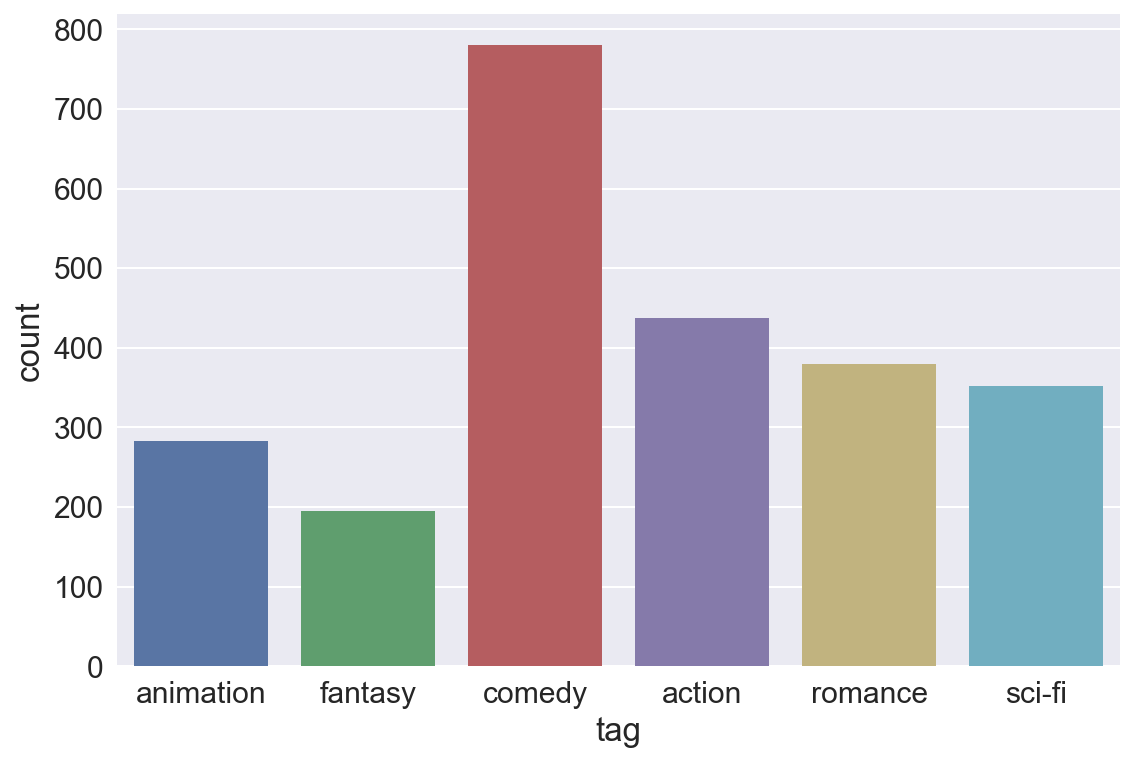

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(movies['tag'], label='Count', ax=ax)
plt.show()

The dataset is quite unbalanced with Comedy representing circa 32% and Fantasy only 8%of the movies

Let's start by understanding the data further. 
I want to break up the text and see what is in them. What differentiates each class before making any predictions.

In [61]:
# Step 1. Clean up the text. remove case, punctuation, stopwords and split words

In [134]:
translator=str.maketrans('','',string.punctuation)
movies['text']=movies['plot'].apply(lambda x:x.translate(translator).lower())
movies['text'][20]

'two criminals and their hostages unknowingly seek temporary refuge in an establishment populated by vampires with chaotic results'

In [135]:
# Initialize count vectorizer and fit transform processed titles
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(movies['text'])

In [136]:
# Helper function
def plot_25_most_common_words(count_data, count_vectorizer):
#     import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:25]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('25 Most Common Words - All Movies')
    plt.show()

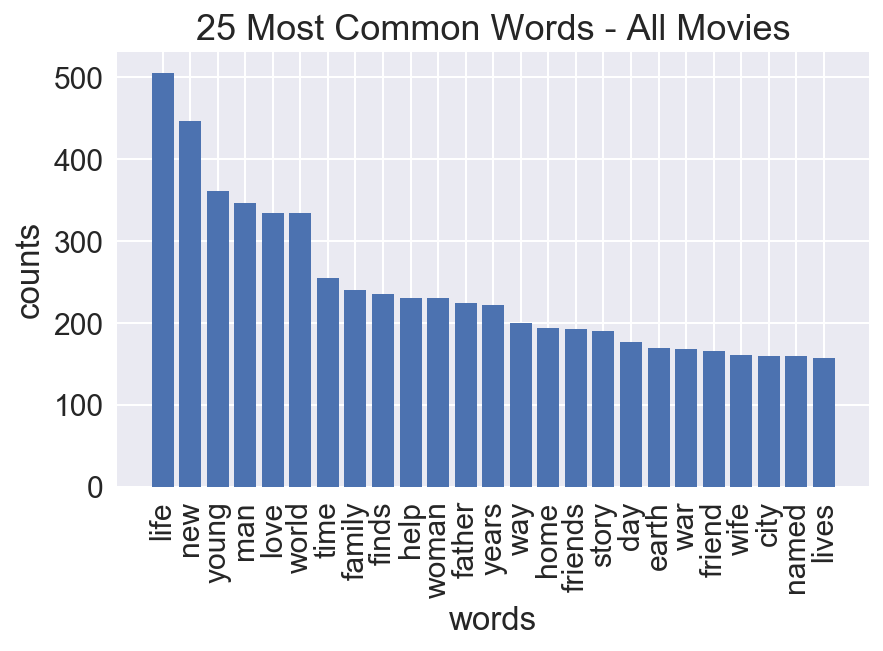

In [137]:
plot_25_most_common_words(count_data, count_vectorizer)

In [ ]:
# By Movie category:

In [ ]:
# Helper function
def plot_25_most_common_words(count_data, count_vectorizer):
#     import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:25]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('25 Most Common Words - All Movies')
    plt.show()

In [140]:
movies['tag_id'] = movies['tag'].factorize()[0]

In [144]:
tag_id_movies=movies[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')

In [145]:
tag_id_movies

,tag,tag_id
0,animation,0
1,fantasy,1
2,comedy,2
3,action,3
4,romance,4
11,sci-fi,5


In [146]:
tag_to_id = dict(tag_id_movies.values)
tag_to_id

{'action': 3,
 'animation': 0,
 'comedy': 2,
 'fantasy': 1,
 'romance': 4,
 'sci-fi': 5}

In [147]:
id_to_tag = dict(tag_id_movies[['tag_id', 'tag']].values)
id_to_tag

{0: 'animation',
 1: 'fantasy',
 2: 'comedy',
 3: 'action',
 4: 'romance',
 5: 'sci-fi'}

In [ ]:
# category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'Product']].values)

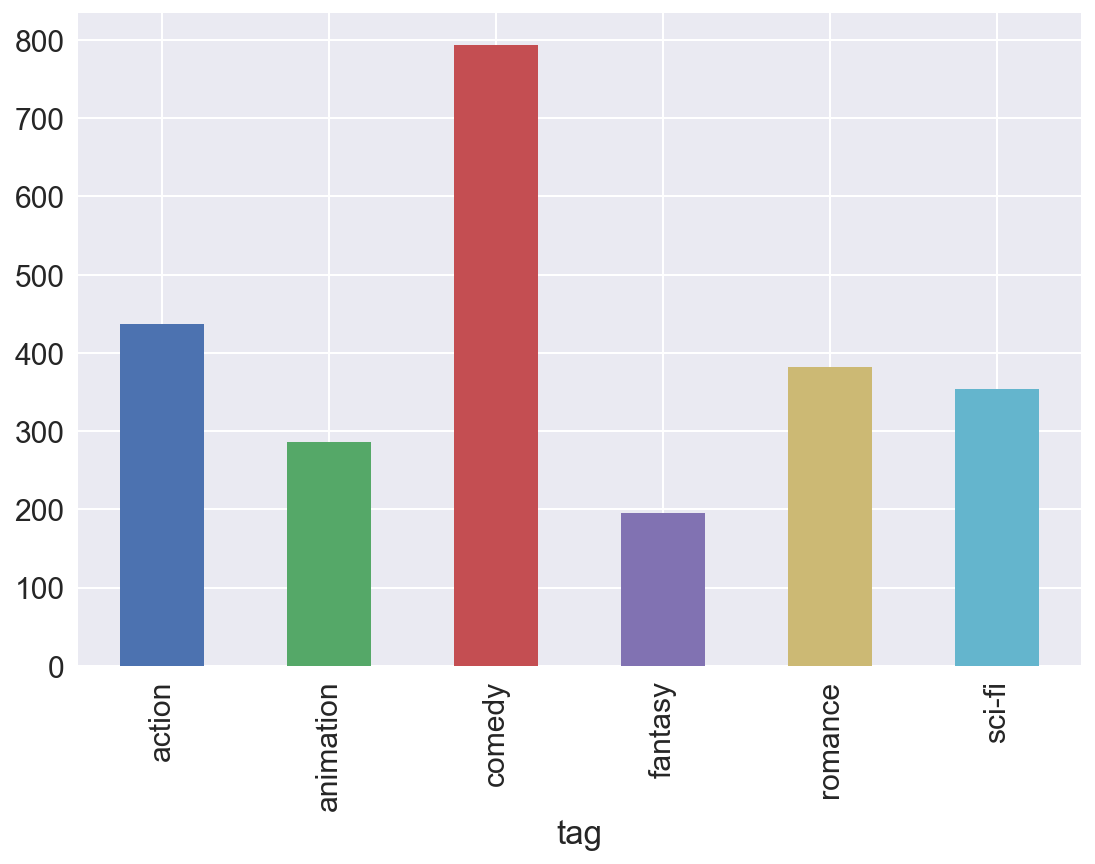

In [139]:
fig = plt.figure(figsize=(8,6))
movies.groupby('tag').text.count().plot.bar(ylim=0)
plt.show()


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(movies.text).toarray()
labels = movies.tag_id
features.shape

(2448, 3439)

In [150]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for tag, tag_id in sorted(tag_to_id.items()):
    features_chi2=chi2(features, labels==tag_id)
#   features_chi2 = chi2(features, labels == category_id)
    indices=np.argsort(features_chi2[0])
#   indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(tag))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
 

# 'action':
  . Most correlated unigrams:
       . agent
       . cia
  . Most correlated bigrams:
       . martial arts
       . cia agent
# 'animation':
  . Most correlated unigrams:
       . mouse
       . animated
  . Most correlated bigrams:
       . young boy
       . boy named
# 'comedy':
  . Most correlated unigrams:
       . comedy
       . nan
  . Most correlated bigrams:
       . police academy
       . high school
# 'fantasy':
  . Most correlated unigrams:
       . magic
       . hogwarts
  . Most correlated bigrams:
       . old girl
       . dark lord
# 'romance':
  . Most correlated unigrams:
       . falls
       . love
  . Most correlated bigrams:
       . love woman
       . falls love
# 'sci-fi':
  . Most correlated unigrams:
       . earth
       . alien
  . Most correlated bigrams:
       . alien race
       . human race


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import nltk

In [184]:
movies_vect=CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)
movies_counts=movies_vect.fit_transform(movies.text)

In [185]:
# 2,448 documents, 8331 unique terms. 
movies_counts.shape

(2448, 8331)

In [186]:
# Next: Convert raw frequency counts to TD-IDF

tfidf_transformer = TfidfTransformer()
movies_tfidf = tfidf_transformer.fit_transform(movies_counts)

In [189]:
movies_tfidf.shape

(2448, 8331)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(movies_tfidf, movies['tag_id'], test_size=0.3, random_state = 0)


In [191]:
clf = MultinomialNB().fit(X_train, y_train)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(movies['text'], movies['tag'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
# X_test_counts = count_vect.fit_transform(X_test)

# Convert raw frequency counts into TF-IDF values

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_test_tfidf=tfidf_transformer.fit_transform(X_test_counts)


clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()
movie_tfidf = tfidf_transformer.fit_transform(movie_counts)


In [228]:
print(clf.predict(movies_vect.transform([movies['text'][0]])))

[2]


In [220]:
test=clf.predict(movies_vect.transform(movies['text']))

In [230]:
test

array([0, 0, 2, ..., 5, 5, 5])

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

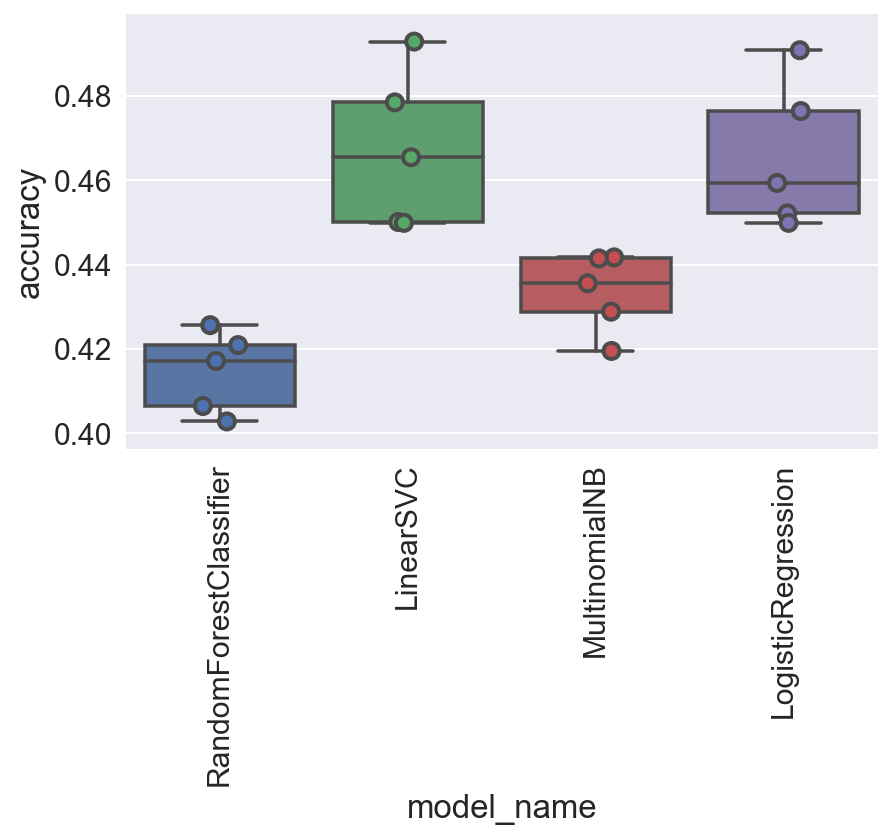

In [244]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=90)
plt.show()


In [245]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.467346
LogisticRegression        0.465714
MultinomialNB             0.433439
RandomForestClassifier    0.414630
Name: accuracy, dtype: float64

In [ ]:
# Try to improve accuracy by using cost- sensitive training. Look only at the SVC model

In [284]:
model = LinearSVC(class_weight='balanced')

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, movies.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [294]:
# Slight improvement but not as good as i would like.
print(model.score(X_test, y_test))

0.47277227722772275


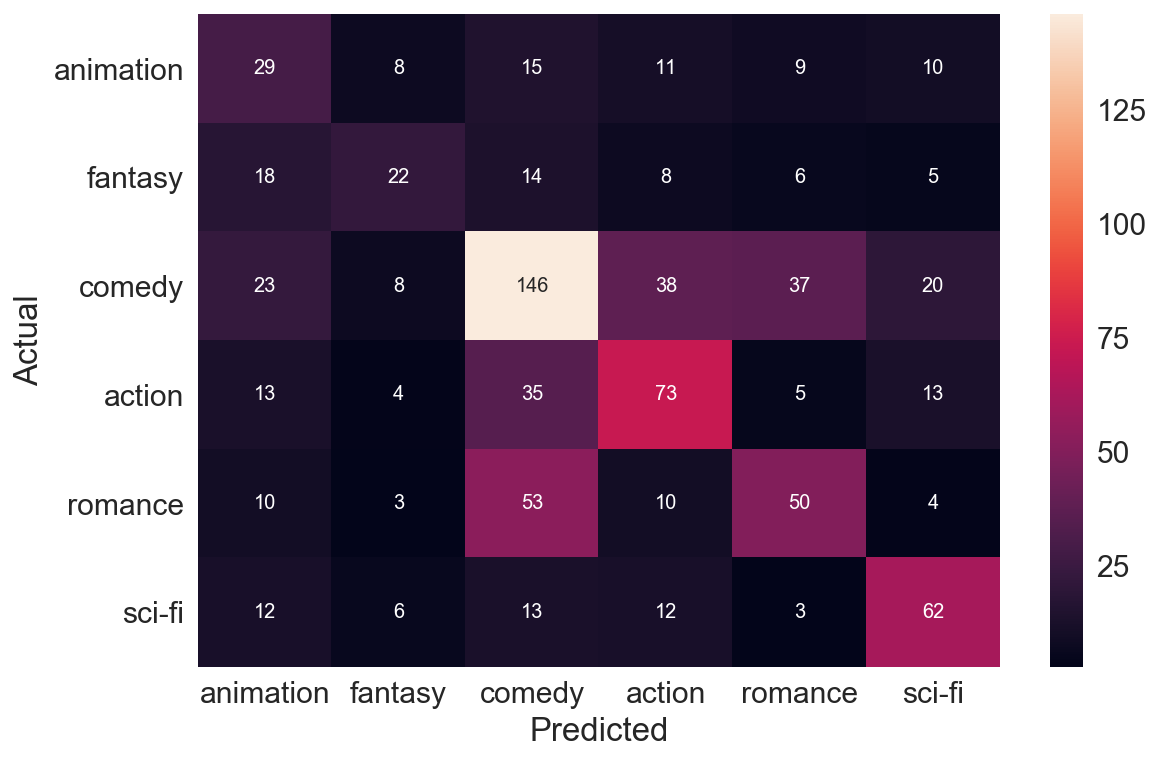

In [290]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=tag_id_movies.tag.values, yticklabels=tag_id_movies.tag.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [291]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=movies['tag'].unique()))

             precision    recall  f1-score   support

  animation       0.28      0.35      0.31        82
    fantasy       0.43      0.30      0.35        73
     comedy       0.53      0.54      0.53       272
     action       0.48      0.51      0.49       143
    romance       0.45      0.38      0.42       130
     sci-fi       0.54      0.57      0.56       108

avg / total       0.48      0.47      0.47       808



# Forward plan:
    - grid search models using pipeline. find best_params.
    -test other tree methods